# Use Case is Predicting House Rent 

1. Dataset Structure
2. BHK: Number of Bedrooms, Hall, Kitchen.
3. Rent: Rent of the Houses/Apartments/Flats.
4. Size: Size of the Houses/Apartments/Flats in Square Feet.
5. Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
6. Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
7. Area Locality: Locality of the Houses/Apartments/Flats.
8. City: City where the Houses/Apartments/Flats are Located.
9. Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
10. Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
11. Bathroom: Number of Bathrooms.
12. Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Importing Dataset from CSV in DataFrame using Pandas

df = pd.read_csv('House_Rent_Dataset.csv')
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
# Geting details about Columns of dataset

df.info()
df.describe()
print(" \nSum of Null Values in columns :\n{}".format(df.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
 
Sum of Null Values in columns :
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locali

#### No Null Values

In [3]:
# To Check if there are any duplicate rows in Dataset

duplicates = df.duplicated().sum()
print("Number of duplicate rows {}".format(duplicates))

Number of duplicate rows 0


#### No duplicate recrods found

In [4]:
df_columns = list(df.columns)
print(df_columns)

for col in df_columns:
    if df[col].dtype == 'object':
        print(df[col].unique())
    
    

['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']
['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25

Data is having consistency in names accross differnt columns

#### Spliting 'Floor' into 'Rented Floor' and 'Total Floor' Column from dataset as nuimber of floor can play important role in deciding it's Rent price

In [5]:
df['Rented Floor'] = df['Floor'].apply(lambda x: x.split(" out of ")[0])
df['Total Floor'] = df['Floor'].apply(lambda x: x.split(" ")[-1])
#df['Posted Year'] = df['Posted On'].apply(lambda x: x.split("-")[0])
df.head(5)
#df['Posted Year'].unique()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rented Floor,Total Floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [6]:
for col in df.keys():
    if col == 'Rented Floor' or col == 'Total Floor':
        print("\n Columne Name {} and unique values are:\n{}".format(col,df[col].unique()))


 Columne Name Rented Floor and unique values are:
['Ground' '1' '2' '4' '3' '5' '7' '8' 'Upper Basement' '11'
 'Lower Basement' '6' '14' '43' '13' '18' '17' '9' '19' '60' '34' '12'
 '26' '25' '53' '16' '10' '39' '32' '47' '28' '20' '15' '65' '40' '37'
 '22' '21' '30' '35' '33' '44' '41' '46' '27' '45' '48' '50' '24' '23'
 '29' '49' '36' '76']

 Columne Name Total Floor and unique values are:
['2' '3' '1' '4' '5' '14' '8' '6' '19' '10' '7' '13' '78' '18' '12' '24'
 '31' '21' '23' '20' '9' '22' '58' '16' '66' '48' '40' '44' '42' '41' '60'
 '32' '30' '29' '89' '15' '11' '28' '17' '45' '35' '75' '38' '51' '43'
 '25' '27' '26' '76' '36' '37' '55' '68' '77' '50' '59' '62' '39' '52'
 '54' '33' '46' '85' '71' '81' '34' 'Ground']


### Replacing Floor with numeric values and changing it's Datatype as int 
For Columns 'Rented Floor' & 'Total Floor'  and values will be: Ground = 0 , Upper Basement = -1, Lower Basement = -2


In [7]:
df["Rented Floor"] = df["Rented Floor"].replace(["Ground", "Upper Basement", "Lower Basement"], [0, -1, -2]).astype(int)
df["Total Floor"] = df["Total Floor"].replace("Ground", 0).astype(int)
df["Area Type"] = df["Area Type"].replace(["Super Area", "Carpet Area", "Built Area"], [0, 1, 2]).astype(int)
# Now we can drop Floor Column of original dataset
df.drop(columns = "Floor", inplace = True)

# Now our data looks like below
df.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rented Floor,Total Floor
0,2022-05-18,2,10000,1100,0,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,0,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,0,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,0,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


    Posted On  BHK   Rent  Size  Area Type     City Furnishing Status  \
0  2022-05-18    2  10000  1100          0  Kolkata       Unfurnished   
1  2022-05-13    2  20000   800          0  Kolkata    Semi-Furnished   
2  2022-05-16    2  17000  1000          0  Kolkata    Semi-Furnished   
3  2022-07-04    2  10000   800          0  Kolkata       Unfurnished   
4  2022-05-09    2   7500   850          1  Kolkata       Unfurnished   

   Tenant Preferred  Bathroom Point of Contact  Rented Floor  Total Floor  
0  Bachelors/Family         2    Contact Owner             0            2  
1  Bachelors/Family         1    Contact Owner             1            3  
2  Bachelors/Family         1    Contact Owner             1            3  
3  Bachelors/Family         1    Contact Owner             1            2  
4         Bachelors         1    Contact Owner             1            2  


<AxesSubplot:>

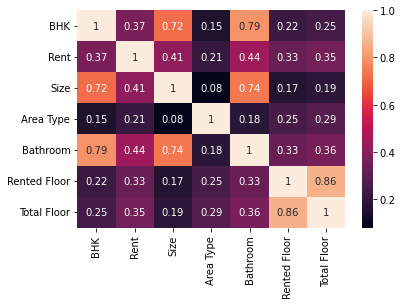

In [8]:
# There are few columns which we are not taking into consideration for RENT Price Prediction for the time being.

df_n1 = df.drop('Area Locality', axis=1)

print(df_n1.head())

df_ht_map=df_n1.corr()
df_ht_map
sns.heatmap(df_ht_map,annot=True,)

### Doing Preprocessing before ML



In [9]:

from sklearn.linear_model import Lasso
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier

df_n1.info()
df_n1.head()
print("Columns : {}".format(df_n1.columns))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Area Type          4746 non-null   int32 
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
 10  Rented Floor       4746 non-null   int32 
 11  Total Floor        4746 non-null   int32 
dtypes: int32(3), int64(4), object(5)
memory usage: 389.4+ KB
Columns : Index(['Posted On', 'BHK', 'Rent', 'Size', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Rented Floo

## Model can be used to predict rent based on 
1. City 
2. Tenant Preferred
3. Furnishing Status
4. Point of Contact
5. Posted On 


### Creating Models For: City

In [10]:
#def train_model(Spl_feature):
#    all_cols = df_n1.columns
#    for col in all_cols:
#        if df_n1[col].dtype != 'object' and 
columns_l2=['Posted On', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact' ]
df_n2=df_n1.drop(columns_l2, axis=1)
print(df_n2.head())

df_n2_dummies=pd.get_dummies(df_n2, drop_first = True)
print("DataFrame after Categories are encoded: {}".format(df_n2_dummies))

X=df_n2_dummies.drop('Rent', axis=1).values
y=df_n2_dummies['Rent'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =21)

#scaler = StandardScaler()
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

X_train_scaled= min_max_scaler.fit_transform(X_train)
X_test_scaled= min_max_scaler.transform(X_test)

#X_test_scaled= min_max_scaler.fit_transform(X_tn)
#y_test_scaled= min_max_scaler.fit_transform(X_train)

selected_Cols= df_n2.drop('Rent',axis=1).columns
print(selected_Cols)

   BHK   Rent  Size  Area Type     City  Bathroom  Rented Floor  Total Floor
0    2  10000  1100          0  Kolkata         2             0            2
1    2  20000   800          0  Kolkata         1             1            3
2    2  17000  1000          0  Kolkata         1             1            3
3    2  10000   800          0  Kolkata         1             1            2
4    2   7500   850          1  Kolkata         1             1            2
DataFrame after Categories are encoded:       BHK   Rent  Size  Area Type  Bathroom  Rented Floor  Total Floor  \
0       2  10000  1100          0         2             0            2   
1       2  20000   800          0         1             1            3   
2       2  17000  1000          0         1             1            3   
3       2  10000   800          0         1             1            2   
4       2   7500   850          1         1             1            2   
...   ...    ...   ...        ...       ...           

### Lasso regression for feature importance

lasso = Lasso(alpha=0.3)
Fit the model to the data
lasso.fit(X,y)

Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(selected_Cols, lasso_coef)
plt.xticks(rotation=45)
plt.show()

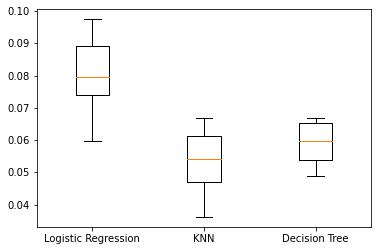

In [11]:
# Creating a pipeline for Model Training

models= { 'Logistic Regression': LogisticRegression(),
            'KNN' : KNeighborsClassifier(),
            'Decision Tree' : DecisionTreeClassifier()}

results= []

for model in models.values():
    kf = KFold( n_splits = 6, shuffle = True, random_state = 21)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv= kf)
    
    results.append(cv_results)
    
plt.boxplot(results, labels = models.keys())
plt.show()

#### Test Models Performance : For City

In [12]:
# Testing Performance 

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(" {} Test Set Accuracy: {}".format(name, test_score))

 Logistic Regression Test Set Accuracy: 0.07724719101123595
 KNN Test Set Accuracy: 0.060393258426966294
 Decision Tree Test Set Accuracy: 0.07162921348314606


## Models For: Tenant Preferred



   BHK   Rent  Size  Area Type  Tenant Preferred  Bathroom  Rented Floor  \
0    2  10000  1100          0  Bachelors/Family         2             0   
1    2  20000   800          0  Bachelors/Family         1             1   
2    2  17000  1000          0  Bachelors/Family         1             1   
3    2  10000   800          0  Bachelors/Family         1             1   
4    2   7500   850          1         Bachelors         1             1   

   Total Floor  
0            2  
1            3  
2            3  
3            2  
4            2  
DataFrame after Categories are encoded:       BHK   Rent  Size  Area Type  Bathroom  Rented Floor  Total Floor  \
0       2  10000  1100          0         2             0            2   
1       2  20000   800          0         1             1            3   
2       2  17000  1000          0         1             1            3   
3       2  10000   800          0         1             1            2   
4       2   7500   850         

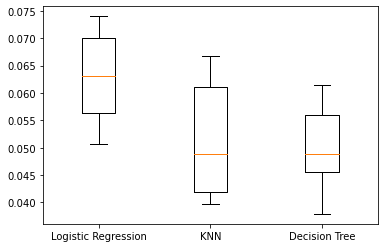

 Logistic Regression Test Set Accuracy for Tenant Preferred: 0.06530898876404495
 KNN Test Set Accuracy for Tenant Preferred: 0.05266853932584269
 Decision Tree Test Set Accuracy for Tenant Preferred: 0.04564606741573034


In [13]:
### If we are checking this for Tenant Preferred


columns_l3 = ['Posted On', 'Furnishing Status', 'City', 'Point of Contact' ]
df_n3=df_n1.drop(columns_l3, axis=1)
print(df_n3.head())

df_n3_dummies=pd.get_dummies(df_n3, drop_first = True)
print("DataFrame after Categories are encoded: {}".format(df_n3_dummies))


X_2=df_n3_dummies.drop('Rent', axis=1).values
y_2=df_n3_dummies['Rent'].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size =0.3, random_state =21)

#scaler = StandardScaler()
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled_2= min_max_scaler.fit_transform(X_train_2)
X_test_scaled_2= min_max_scaler.transform(X_test_2)

#X_test_scaled= min_max_scaler.fit_transform(X_tn)
#y_test_scaled= min_max_scaler.fit_transform(X_train)

selected_Cols_2= df_n3.drop('Rent',axis=1).columns
print(selected_Cols_2)

# Creating a pipeline for Model Training

models_2 = { 'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
            'KNN' : KNeighborsClassifier(),
            'Decision Tree' : DecisionTreeClassifier()}

results_2= []

for model in models_2.values():
    kf = KFold( n_splits = 6, shuffle = True, random_state = 21)
    cv_results_2 = cross_val_score(model, X_train_scaled_2, y_train_2, cv= kf)
    
    results_2.append(cv_results_2)
    
plt.boxplot(results_2, labels = models.keys())
plt.show()

# Testing Performance 

for name, model in models_2.items():
    model.fit(X_train_scaled_2, y_train_2)
    test_score = model.score(X_test_scaled_2, y_test_2)
    print(" {} Test Set Accuracy for Tenant Preferred: {}".format(name, test_score))


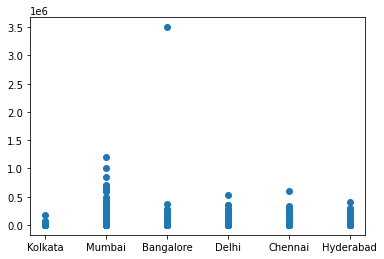

In [15]:
plt.scatter(df_n1['City'], df_n1['Rent'])
plt.show()

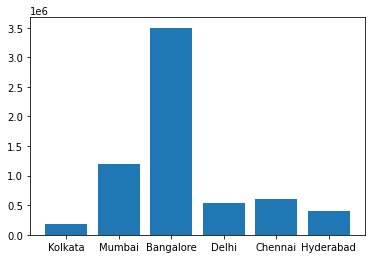

In [19]:
plt.bar(df_n1['City'], df_n1['Rent'])
plt.show()

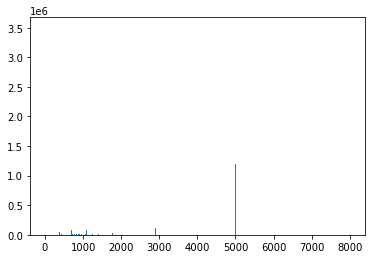

In [25]:
plt.bar(df_n1['Size'], df_n1['Rent'])
plt.show()